In [54]:
import pandas as pd
import numpy as np
colnames=['timestamp', 'input', 'exe_status', 'mutation_distance', 'coverage_map']
data = pd.read_csv("mutation2.log", sep='\~fz ', names=colnames, engine='python');
print(data.shape)

(404, 5)


In [13]:
data.head(10)

,timestamp,input,exe_status,mutation_distance,coverage_map
0,"2023-03-23T11:30:39,994","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,0,"cov:{0=4, 40960=1, 12289=2, 20481=1, 40964=2, ..."
1,"2023-03-23T11:30:40,015","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,30,"cov:{0=4, 40960=1, 12289=2, 20481=1, 40964=2, ..."
2,"2023-03-23T11:30:40,022","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,29,"cov:{0=4, 40960=1, 12289=2, 20481=1, 40964=2, ..."
3,"2023-03-23T11:30:40,028","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,55,"cov:{0=4, 40960=3, 12289=2, 20481=1, 40964=2, ..."
4,"2023-03-23T11:30:40,034","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,51,cov:s
5,"2023-03-23T11:30:40,038","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,0,cov:s
6,"2023-03-23T11:30:40,044","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,27,"cov:{0=4, 40960=3, 12289=2, 20481=1, 40964=2, ..."
7,"2023-03-23T11:30:40,050","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,43,"cov:{0=4, 40960=3, 12289=2, 20481=1, 40964=2, ..."
8,"2023-03-23T11:30:40,057","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,139,"cov:{0=4, 40960=7, 12289=6, 20481=1, 40964=2, ..."
9,"2023-03-23T11:30:40,076","[<?xml version=""1.0"" encoding=""UTF-8"" standalo...",INVALID,1522,"cov:{0=4, 40960=39, 12289=38, 20481=1, 40964=2..."


In [38]:
def mergeDictionary(dict_1, dict_2):
   dict_3 = {**dict_1, **dict_2}
   for key, value in dict_3.items():
       if key in dict_1 and key in dict_2:
               dict_3[key] = dict_1[key] + dict_2[key]
   return dict_3

In [43]:
result = {}
cov = {}
same=0

for input in range(10): #len(data)
    print('Input #{}'.format(input))
#     result.append({})
    string = data.iloc[input,4]
    if len(string)<5:
        continue
    elif string!="cov:s":
        string = string[5:-1]  # remove curly braces at beginning and end
        items = string.split(", ")  # split string into key-value pairs
#         same=0
        for item in items:
            key, value = item.split("=")
            cov[int(key)] = int(value)
#     elif string=="cov:s":
#         same+=1
     
    
    
    result = mergeDictionary(result, cov)

print(result)

Input #0
Input #1
Input #2
Input #3
Input #4
Input #5
Input #6
Input #7
Input #8
Input #9
{'0': 40, '40960': 64, '12289': 60, '20481': 10, '40964': 20, '45067': 64, '36876': 10, '14': 10, '49168': 640, '57360': 64, '49170': 10, '61456': 10, '28': 10, '4124': 20, '16414': 64, '40991': 58, '32797': 20, '4138': 40, '8234': 20, '41014': 20, '49208': 10, '41017': 10, '20538': 64, '45118': 64, '32832': 10, '36929': 46, '45124': 46, '57414': 640, '28744': 56, '45129': 10, '53321': 10, '32845': 46, '79': 10, '53328': 20, '53329': 10, '57427': 20, '32853': 10, '49242': 548, '61532': 10, '57441': 24, '61537': 46, '41062': 18, '8296': 64, '57448': 10, '107': 10, '109': 10, '61549': 80, '24687': 46, '32879': 40, '114': 40, '61555': 52, '41079': 10, '16506': 24, '4220': 10, '53376': 10, '36998': 10, '20616': 10, '49290': 10, '20619': 80, '144': 112, '12433': 46, '41110': 160, '24727': 20, '49306': 56, '155': 10, '12444': 24, '49313': 46, '16546': 20, '8355': 20, '20645': 10, '4262': 10, '64577': 40

In [59]:
def compareCoverage(parent, child):
    dict_3 = {**parent, **child}
    coverage = 0
    for key, value in dict_3.items():
        if key in parent and key in child:
            coverage += child[key]/(child[key]+parent[key])
        elif key in parent and key not in child:
            coverage -= parent[key]
        elif key in child and key not in parent:
            coverage += child[key]
    return coverage

In [61]:
parent = {}
child = {}
diff = np.zeros(len(data), dtype=int)

for input in range(len(data)):#len(data)
    string = data.iloc[input,4]
    if len(string)<5:
        diff[input] = compareCoverage(parent, {})
        continue
    elif string!="cov:s":
        string = string[5:-1]  # remove curly braces at beginning and end
        items = string.split(", ")  # split string into key-value pairs
        
        for item in items:
            key, value = item.split("=")
            child[int(key)] = int(value)
    elif string=="cov:s":
        diff[input] = 0
        continue
        
    if parent=={}:
        diff[input] = 0
        parent = child
        continue
    
    diff[input] = compareCoverage(parent, child)

print(diff)

[  0 759 760 775   0   0 775 775 822 863   0   0 865   0 865   0   0   0
 865 865   0 865   0 865 865 873 873 874 874 874   0   0 874   0 874   0
   0   0   0   0 874   0   0   0 874 874   0 874   0 874   0   0 874   0
   0   0   0   0   0 874   0 874   0   0 874   0   0 874   0   0   0   0
 895   0   0   0   0   0   0   0 895   0   0   0 895   0   0   0   0   0
 895 895   0   0   0   0   0   0   0   0   0 895 895   0   0   0   0   0
 895   0   0   0   0   0   0 895   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 944   0   0 944   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 944   0   0   0   0   0   0   0 944
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 944
   0   0 945   0   0 945   0   0   0   0   0   0   

In [91]:
exe_status = data['exe_status'].to_numpy()
mutation_dist = data['mutation_distance'].to_numpy()


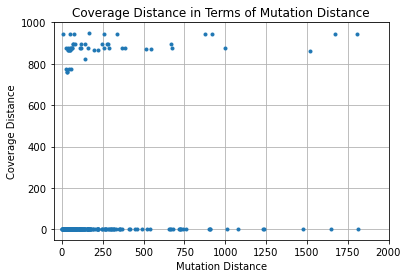

In [88]:
import matplotlib.pyplot as plt

f1 = plt.figure(1)


mutation_dist = data['mutation_distance'].to_numpy()

plt.plot(mutation_dist, diff, '.')

plt.xlabel('Mutation Distance')
plt.ylabel('Coverage Distance')
plt.title('Coverage Distance in Terms of Mutation Distance')

plt.axis([-50,2000,-50,1000])
plt.grid(True)


In [79]:
mutation_dist

array([   0,   30,   29,   55,   51,    0,   27,   43,  139, 1522, 1649,
          9,   51,   50,   48,   51,   32,   54,  224,  196,  100,   44,
         43,   36,   38,  548,  516,   58,  287,  257,   57,   10,   40,
         40,   28,   28,   24,   72,   80,   36,   61,   49,   25,   49,
        368,  384,   24,  998, 1012,  120,  104,  151,  160,   12,   21,
         28,   32,   25,  103,  111,   41,   48,   43,   18,   60,   60,
         70,  674,  670,   22,   16,    7,  117,  122,   18,   41,   35,
         24,   33,   26,  141,  126,   54,   42,   70,   69,   43,   36,
         28,   29,   67,   81,   83,   27,   32,   63,   63,   46,   42,
         31,   43,  248,  281,   41,   42,   30,   16,   26,  275,  271,
         29,   30,  539,  520,   36,  669,  715,   28,   29,   31,   30,
        190,  172,   35,   30,   34,   46,   34,   59,   56,  280,  302,
         25,   48,  112,  122,   52,   49,   35,   30,   26,   27,   90,
         88,   30,   22,   47,   39,   12,  295,  3

In [92]:
exe_status

array(['INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID',
       'INVALID', 'INVALID', 'INVALID', 'INVALID', 